In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [5]:
df = pd.read_csv('data/S&P 500/2021/TSLA.csv')
df

,date,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,2020-01-02 09:30:00-05:00,28.3000,28.5000,28.2927,28.4667,5024685.0,28.3566,1577975400000,2577,NaN
1,2020-01-02 09:31:00-05:00,28.4830,28.5117,28.3567,28.4467,1815930.0,28.4462,1577975460000,1591,NaN
2,2020-01-02 09:32:00-05:00,28.4449,28.4449,28.3727,28.4150,1338435.0,28.4130,1577975520000,1212,NaN
3,2020-01-02 09:33:00-05:00,28.4102,28.5333,28.4000,28.5173,1690905.0,28.4826,1577975580000,1594,NaN
4,2020-01-02 09:34:00-05:00,28.5272,28.5333,28.3807,28.4062,1526805.0,28.4767,1577975640000,1296,NaN
...,...,...,...,...,...,...,...,...,...,...
101667,2020-12-31 15:56:00-05:00,235.0950,235.3117,235.0567,235.2296,321456.0,235.2002,1609448160000,2053,NaN
101668,2020-12-31 15:57:00-05:00,235.2317,235.4667,235.2267,235.3633,484725.0,235.3562,1609448220000,2701,NaN
101669,2020-12-31 15:58:00-05:00,235.3833,235.5000,235.2900,235.4900,505494.0,235.3498,1609448280000,2852,NaN
101670,2020-12-31 15:59:00-05:00,235.4640,235.6333,235.0000,235.0700,940443.0,235.3709,1609448340000,5234,NaN


In [7]:
df['closelog'] = np.log10(df.close)

<AxesSubplot:xlabel='timestamp'>

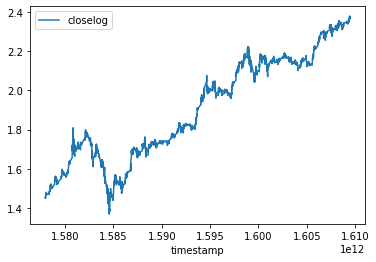

In [128]:
df.plot('timestamp', 'closelog')

In [250]:
x, y = df.timestamp.values, df.closelog.values
y = y.reshape(-1, 1)
size = len(x)
bound = int(0.7*size)



x_train, x_test = x[:bound], x[bound:]
y_train, y_test = y[:bound], y[bound:]


steps = 15

x_ds = []
y_ds = []
for i in range(steps, len(x)):
    x_ds.append(y[i-steps:i])
    y_ds.append(y[i])
x_ds, y_ds = np.array(x_ds), np.array(y_ds)

x_train_ds = []
y_train_ds = []
for i in range(steps, len(x_train)):
    x_train_ds.append(y_train[i-steps:i])
    y_train_ds.append(y_train[i])
x_train_ds, y_train_ds = np.array(x_train_ds), np.array(y_train_ds)

x_test_ds = []
y_test_ds = []
for i in range(steps, len(x_test)):
    x_test_ds.append(y_test[i-steps:i])
    y_test_ds.append(y_test[i])
x_test_ds, y_test_ds = np.array(x_test_ds), np.array(y_test_ds)

In [251]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True,
               input_shape=(x_train_ds.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='rmsprop',loss='mean_squared_error')


In [252]:
model.fit(x_train_ds, y_train_ds, epochs=epochs, batch_size=32)

Epoch 1/10
2224/2224 [==============================] - 63s 26ms/step - loss: 0.0332
Epoch 2/10
2224/2224 [==============================] - 61s 27ms/step - loss: 0.0123
Epoch 3/10
2224/2224 [==============================] - 61s 27ms/step - loss: 0.0074
Epoch 4/10
2224/2224 [==============================] - 62s 28ms/step - loss: 0.0042
Epoch 5/10
2224/2224 [==============================] - 62s 28ms/step - loss: 0.0023
Epoch 6/10
2224/2224 [==============================] - 62s 28ms/step - loss: 0.0013
Epoch 7/10
2224/2224 [==============================] - 62s 28ms/step - loss: 8.4288e-04
Epoch 8/10
2224/2224 [==============================] - 63s 28ms/step - loss: 7.1483e-04
Epoch 9/10
2224/2224 [==============================] - 62s 28ms/step - loss: 6.3136e-04
Epoch 10/10
2224/2224 [==============================] - 63s 28ms/step - loss: 5.8533e-04


In [265]:
y_pred  = model.predict(x_test_ds)

953/953 [==============================] - 8s 8ms/step


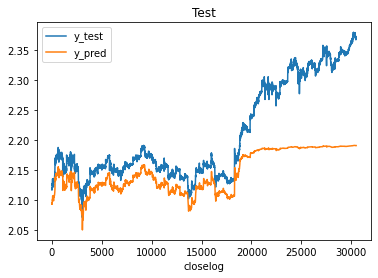

In [269]:
plt.plot(y_test_ds, label='y_test')
plt.plot(*y_pred.reshape(1, -1), label='y_pred')
plt.title('Test')
plt.xlabel('closelog')
plt.legend()
plt.show()